# <div style="text-align: center">**Random Walk Generation**</div>

---



<font color = 'blue'>
    \begin{equation}
    \frac{dS_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t
    \end{equation}
    </font>

In [27]:
import numpy as np
import pandas as pd

def gbm0(n_years=10,n_scenarios=1000,mu=0.07, sigma=0.15, steps_per_year=12,s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps,n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # convert to price
    prices = s_0*(1+rets).cumprod()
    return prices

def gbm1(n_years=10,n_scenarios=1000,mu=0.07, sigma=0.15, steps_per_year=12,s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_one = np.random.normal(loc=(1+mu*dt),scale=sigma*np.sqrt(dt),size=(n_steps,n_scenarios))
    # convert to price
    prices = s_0*pd.DataFrame(rets_plus_one).cumprod()
    return prices

In [28]:
p = gbm0(10,n_scenarios=5)

In [29]:
p.shape

(120, 5)

In [30]:
p.head()

,0,1,2,3,4
0,99.905617,106.251688,105.184389,100.122438,99.460902
1,94.790393,114.157736,98.737204,98.370664,97.933354
2,97.156337,111.868820,101.339333,104.826114,98.409768
3,101.869140,111.952729,97.705600,94.939939,100.017840
4,100.672562,118.095358,86.474310,95.422681,100.009014


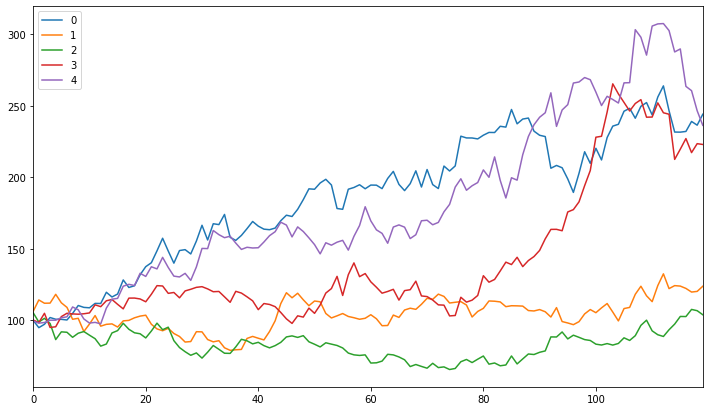

In [31]:
p.plot(figsize=(12,7))

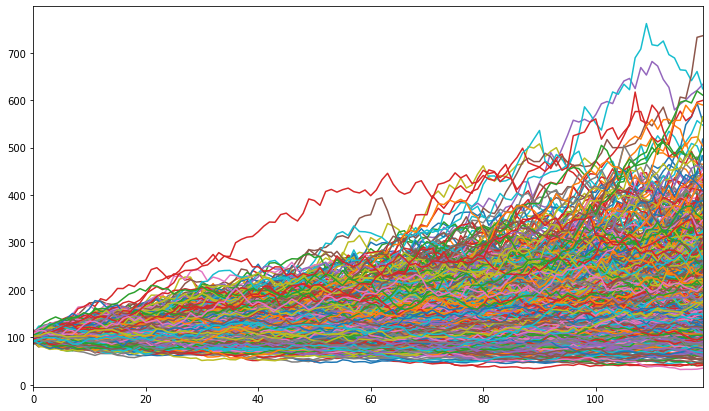

In [32]:
p = gbm0(n_years=10,n_scenarios = 1000).plot(figsize=(12,7),legend=False)

In [34]:
%timeit gbm0(n_years=5,n_scenarios=1000)

495 ms ± 28.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%timeit gbm1(n_years=5,n_scenarios=1000)

230 ms ± 6.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


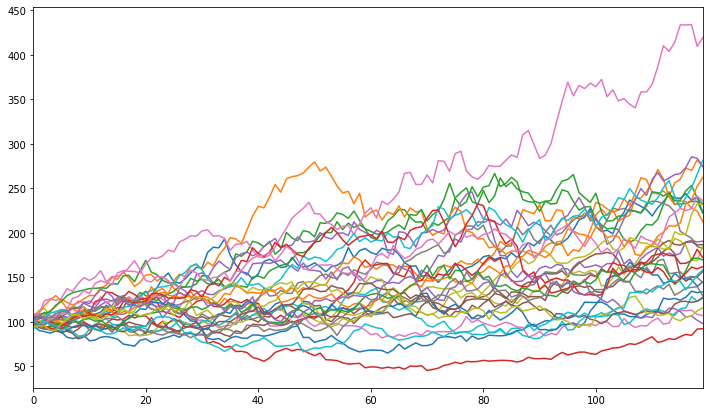

In [40]:
gbm1(n_years=10,n_scenarios=30).plot(figsize=(12,7),legend=False)

In [5]:
import numpy as np
import pandas as pd
def gbm(n_years=10,n_scenarios=1000,mu=0.07, sigma=0.15, steps_per_year=12,s_0=100.0):
    """
    Evolution of a stock price using a geometric brownian motion model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_one = np.random.normal(loc=(1+mu*dt),scale=sigma*np.sqrt(dt),size=(n_steps,n_scenarios))
    rets_plus_one[0]=1
    # convert to price
    prices = s_0*pd.DataFrame(rets_plus_one).cumprod()
    return prices

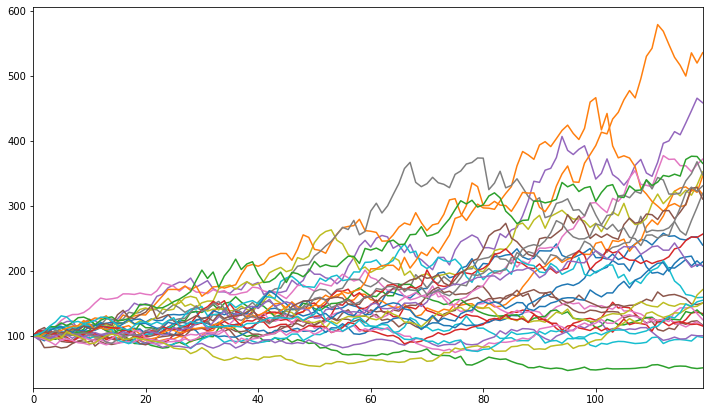

In [7]:
gbm(n_years=10,n_scenarios=30).plot(figsize=(12,7),legend=False)

In [8]:
gbm(n_scenarios = 5).head()

,0,1,2,3,4
0,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.733743,105.794093,107.469626,103.729421,93.646160
2,100.851156,104.822586,109.615985,109.720834,97.176205
3,103.709255,104.649801,114.824313,110.835093,97.903941
4,104.733196,107.671941,117.409000,111.532593,105.837146


- All start with 100